In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# I also like having all results from a cell up
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.dates as mdates

In [6]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.close('all')

In [7]:
# here I list our countries of interest...
countries = ("New Zealand", "United Kingdom", "United States", "Australia", 
             "Chile", "Colombia", "Peru", "Taiwan","Vietnam")

In [8]:
# Time to pull the mortality data
url3 = "https://raw.githubusercontent.com/akarlinsky/world_mortality/main/world_mortality.csv"
mortality = pd.read_csv(url3)
mortality.head()

,iso3c,country_name,year,time,time_unit,deaths
0,ALB,Albania,2015,1,monthly,2490.0
1,ALB,Albania,2015,2,monthly,2139.0
2,ALB,Albania,2015,3,monthly,2051.0
3,ALB,Albania,2015,4,monthly,1906.0
4,ALB,Albania,2015,5,monthly,1709.0


In [9]:
# And, let's do the same thing. I'm also going to rename columns now. 
mortality = mortality.loc[mortality["country_name"].isin(countries)]
mortality["country"] = mortality["country_name"]
mortality = mortality.drop(columns=["country_name"])
mortality["week"] = mortality["time"]
mortality = mortality.drop(columns=["time", "time_unit"])

In [10]:
mortality.head()

,iso3c,year,deaths,country,week
549,AUS,2015,2925.0,Australia,1
550,AUS,2015,2772.0,Australia,2
551,AUS,2015,2770.0,Australia,3
552,AUS,2015,2768.0,Australia,4
553,AUS,2015,2680.0,Australia,5


In [11]:
url0 = "https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/summary_reports/summary_report_countries.csv"
df = pd.read_csv(url0)
df = df.loc[df['country'].isin(countries)]

In [12]:
df["date"] = pd.to_datetime(df["date"])
df["week"] = df["date"].dt.isocalendar().week
df["year"] = df["date"].dt.isocalendar().year
df.sample(10)

,country,date,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking,week,year
124260,Vietnam,2020-08-15,-14.0,8.0,-22.0,-17.0,-8.0,9.0,-1.64,NaN,13.68,33,2020
79926,New Zealand,2021-03-20,14.0,4.0,14.0,-26.0,0.0,2.0,1.78,-39.11,-2.01,11,2021
5559,Australia,2020-07-06,-11.0,-1.0,-8.0,-45.0,-26.0,10.0,3.53,-44.19,-20.86,28,2020
121782,United States,2021-07-20,-2.0,5.0,50.0,-20.0,-33.0,6.0,57.82,-1.14,64.37,29,2021
5486,Australia,2020-04-24,-36.0,-2.0,-27.0,-56.0,-35.0,18.0,-52.16,-79.04,-53.32,17,2020
24084,Colombia,2020-04-21,-76.0,-55.0,-68.0,-74.0,-66.0,32.0,-69.51,NaN,-62.39,17,2020
23818,Chile,2022-03-06,-4.0,22.0,-23.0,6.0,19.0,9.0,15.43,NaN,0.19,9,2022
124151,Vietnam,2020-04-28,-26.0,-13.0,-19.0,-30.0,0.0,9.0,-14.07,NaN,-21.64,18,2020
24505,Colombia,2021-06-16,-8.0,27.0,-5.0,-4.0,-15.0,8.0,-13.90,NaN,15.23,24,2021
24089,Colombia,2020-04-26,-83.0,-68.0,-78.0,-77.0,-50.0,24.0,-69.25,NaN,-56.18,17,2020


In [13]:
# Now we can merge on the unique pairings of country, year, and week 
df = pd.merge(df, mortality, how="outer", on=["country", "week", "year"])

In [14]:
# Let's now make sure that our data-set is sorted and take a peak with a sorted sample. 
# Note that we have to re-set the index manually in Pandas.
df = df.sort_values(by =["country", "year", "date"])
df = df.reset_index(drop=True)
df.head(50)
# This is good -- we should only expect excess mortality data from those earlier years

,country,date,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking,week,year,iso3c,deaths
0,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2015,AUS,2925.0
1,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2015,AUS,2772.0
2,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2015,AUS,2770.0
3,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2015,AUS,2768.0
4,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2015,AUS,2680.0
5,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2015,AUS,2878.0
6,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2015,AUS,2749.0
7,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2015,AUS,2740.0
8,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2015,AUS,2788.0
9,Australia,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2015,AUS,2846.0


In [15]:
# The next step is to make some weekly excess death figures.
# Note that the object that this actually creates is basically a Kronecker decomposition
# We get a list of country-week pairs with deaths for each observation.
# This is explained well here: https://archive.ph/XDSlJ
# Note that the first few observations for, e.g., Australia, Week 1 have distinct values 
# because the daily data-sets don't go that far back
# But then later on, there are repeats, reflecting the start of daily data. 
pre20data = df[df["year"]<2020]
gb = pre20data.groupby(["country", "week"])["deaths"]
for i in gb:
    print(i)

(('Australia', 1), 0      2925.0
53     2789.0
105    2895.0
157    2818.0
209    2966.0
Name: deaths, dtype: float64)
(('Australia', 2), 1      2772.0
54     2870.0
106    2897.0
158    2828.0
210    2997.0
Name: deaths, dtype: float64)
(('Australia', 3), 2      2770.0
55     2825.0
107    2806.0
159    2763.0
211    3041.0
Name: deaths, dtype: float64)
(('Australia', 4), 3      2768.0
56     2668.0
108    2887.0
160    2882.0
212    2957.0
Name: deaths, dtype: float64)
(('Australia', 5), 4      2680.0
57     2817.0
109    2745.0
161    2885.0
213    2890.0
Name: deaths, dtype: float64)
(('Australia', 6), 5      2878.0
58     2730.0
110    2911.0
162    2724.0
214    2957.0
Name: deaths, dtype: float64)
(('Australia', 7), 6      2749.0
59     2734.0
111    2849.0
163    2825.0
215    2958.0
Name: deaths, dtype: float64)
(('Australia', 8), 7      2740.0
60     2753.0
112    2958.0
164    2857.0
216    3094.0
Name: deaths, dtype: float64)
(('Australia', 9), 8      2788.0
61     2728.0
1

Name: deaths, dtype: float64)
(('Peru', 31), 4888    2924.1
4940    3211.0
4992    3060.4
Name: deaths, dtype: float64)
(('Peru', 32), 4889    2974.1
4941    3190.8
4993    3231.8
Name: deaths, dtype: float64)
(('Peru', 33), 4890    2899.8
4942    3073.8
4994    3026.1
Name: deaths, dtype: float64)
(('Peru', 34), 4891    2984.7
4943    2981.0
4995    2994.5
Name: deaths, dtype: float64)
(('Peru', 35), 4892    2989.2
4944    3108.8
4996    3149.5
Name: deaths, dtype: float64)
(('Peru', 36), 4893    3072.6
4945    3076.5
4997    3002.7
Name: deaths, dtype: float64)
(('Peru', 37), 4894    3119.6
4946    2990.5
4998    3076.8
Name: deaths, dtype: float64)
(('Peru', 38), 4895    3052.9
4947    3037.5
4999    3246.9
Name: deaths, dtype: float64)
(('Peru', 39), 4896    3154.5
4948    3130.3
5000    3076.8
Name: deaths, dtype: float64)
(('Peru', 40), 4897    2984.7
4949    3017.3
5001    3075.4
Name: deaths, dtype: float64)
(('Peru', 41), 4898    3148.4
4950    3073.8
5002    3034.3
Name: deat

Name: deaths, dtype: float64)
(('United States', 47), 8238    51590.0
8290    53264.0
8342    54229.0
8394    54983.0
8446    56321.0
Name: deaths, dtype: float64)
(('United States', 48), 8239    52160.0
8291    54716.0
8343    54904.0
8395    55214.0
8447    55608.0
Name: deaths, dtype: float64)
(('United States', 49), 8240    53846.0
8292    55262.0
8344    55751.0
8396    56100.0
8448    57420.0
Name: deaths, dtype: float64)
(('United States', 50), 8241    52379.0
8293    56128.0
8345    57538.0
8397    56533.0
8449    57782.0
Name: deaths, dtype: float64)
(('United States', 51), 8242    53313.0
8294    56854.0
8346    59674.0
8398    56674.0
8450    57585.0
Name: deaths, dtype: float64)
(('United States', 52), 8243    52746.0
8295    57772.0
8347    61255.0
8399    56168.0
8451    58627.0
Name: deaths, dtype: float64)


In [16]:
# Now, we want to take those means 
# This is quite helpful. https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html
df["week_mean_death"] = gb.transform("mean")

In [17]:
df["week_mean_death"] = df.groupby(["country", "week"])["week_mean_death"].ffill()
df["weekly_excess_death"] = df["deaths"] - df["week_mean_death"]
df["excess_mortality"] = (df["weekly_excess_death"]*100)/df["week_mean_death"]
print(df.loc[(df.year == 2020) & (df.week == 1) & (df.country == "Australia")])

       country date  retail and recreation  grocery and pharmacy  parks  \
618  Australia  NaT                    NaN                   NaN    NaN   

     transit stations  workplaces  residential  driving  transit  walking  \
618               NaN         NaN          NaN      NaN      NaN      NaN   

     week  year iso3c  deaths  week_mean_death  weekly_excess_death  \
618     1  2020   AUS  2926.0           2878.6                 47.4   

     excess_mortality  
618          1.646634  


In [36]:
cutoff ='2022-04-01 00:00:00'
df_mod1 = df[(df["year"]>2019) & (df["date"]<cutoff)]
df_mod1 = df_mod1[["date", "country", "driving", "transit", "walking", "excess_mortality"]]
df_mod1[["driving", "transit", "walking", "excess_mortality"]] = df_mod1.rolling(7)["driving", "transit", "walking", "excess_mortality"].mean().fillna(method='bfill').fillna(method='ffill')
df_mod1.dtypes
df_melt1 = pd.melt(df_mod1, ["country", 'date'])
df_melt1.head(20)

date                datetime64[ns]
country                     object
driving                    float64
transit                    float64
walking                    float64
excess_mortality           float64
dtype: object

,country,date,variable,value
0,Australia,2020-01-13,driving,1.892857
1,Australia,2020-01-14,driving,1.892857
2,Australia,2020-01-15,driving,1.892857
3,Australia,2020-01-16,driving,1.892857
4,Australia,2020-01-17,driving,1.892857
5,Australia,2020-01-18,driving,1.892857
6,Australia,2020-01-19,driving,1.892857
7,Australia,2020-01-20,driving,2.397143
8,Australia,2020-01-21,driving,2.942857
9,Australia,2020-01-22,driving,3.398571


AttributeError: 'str' object has no attribute 'figure'

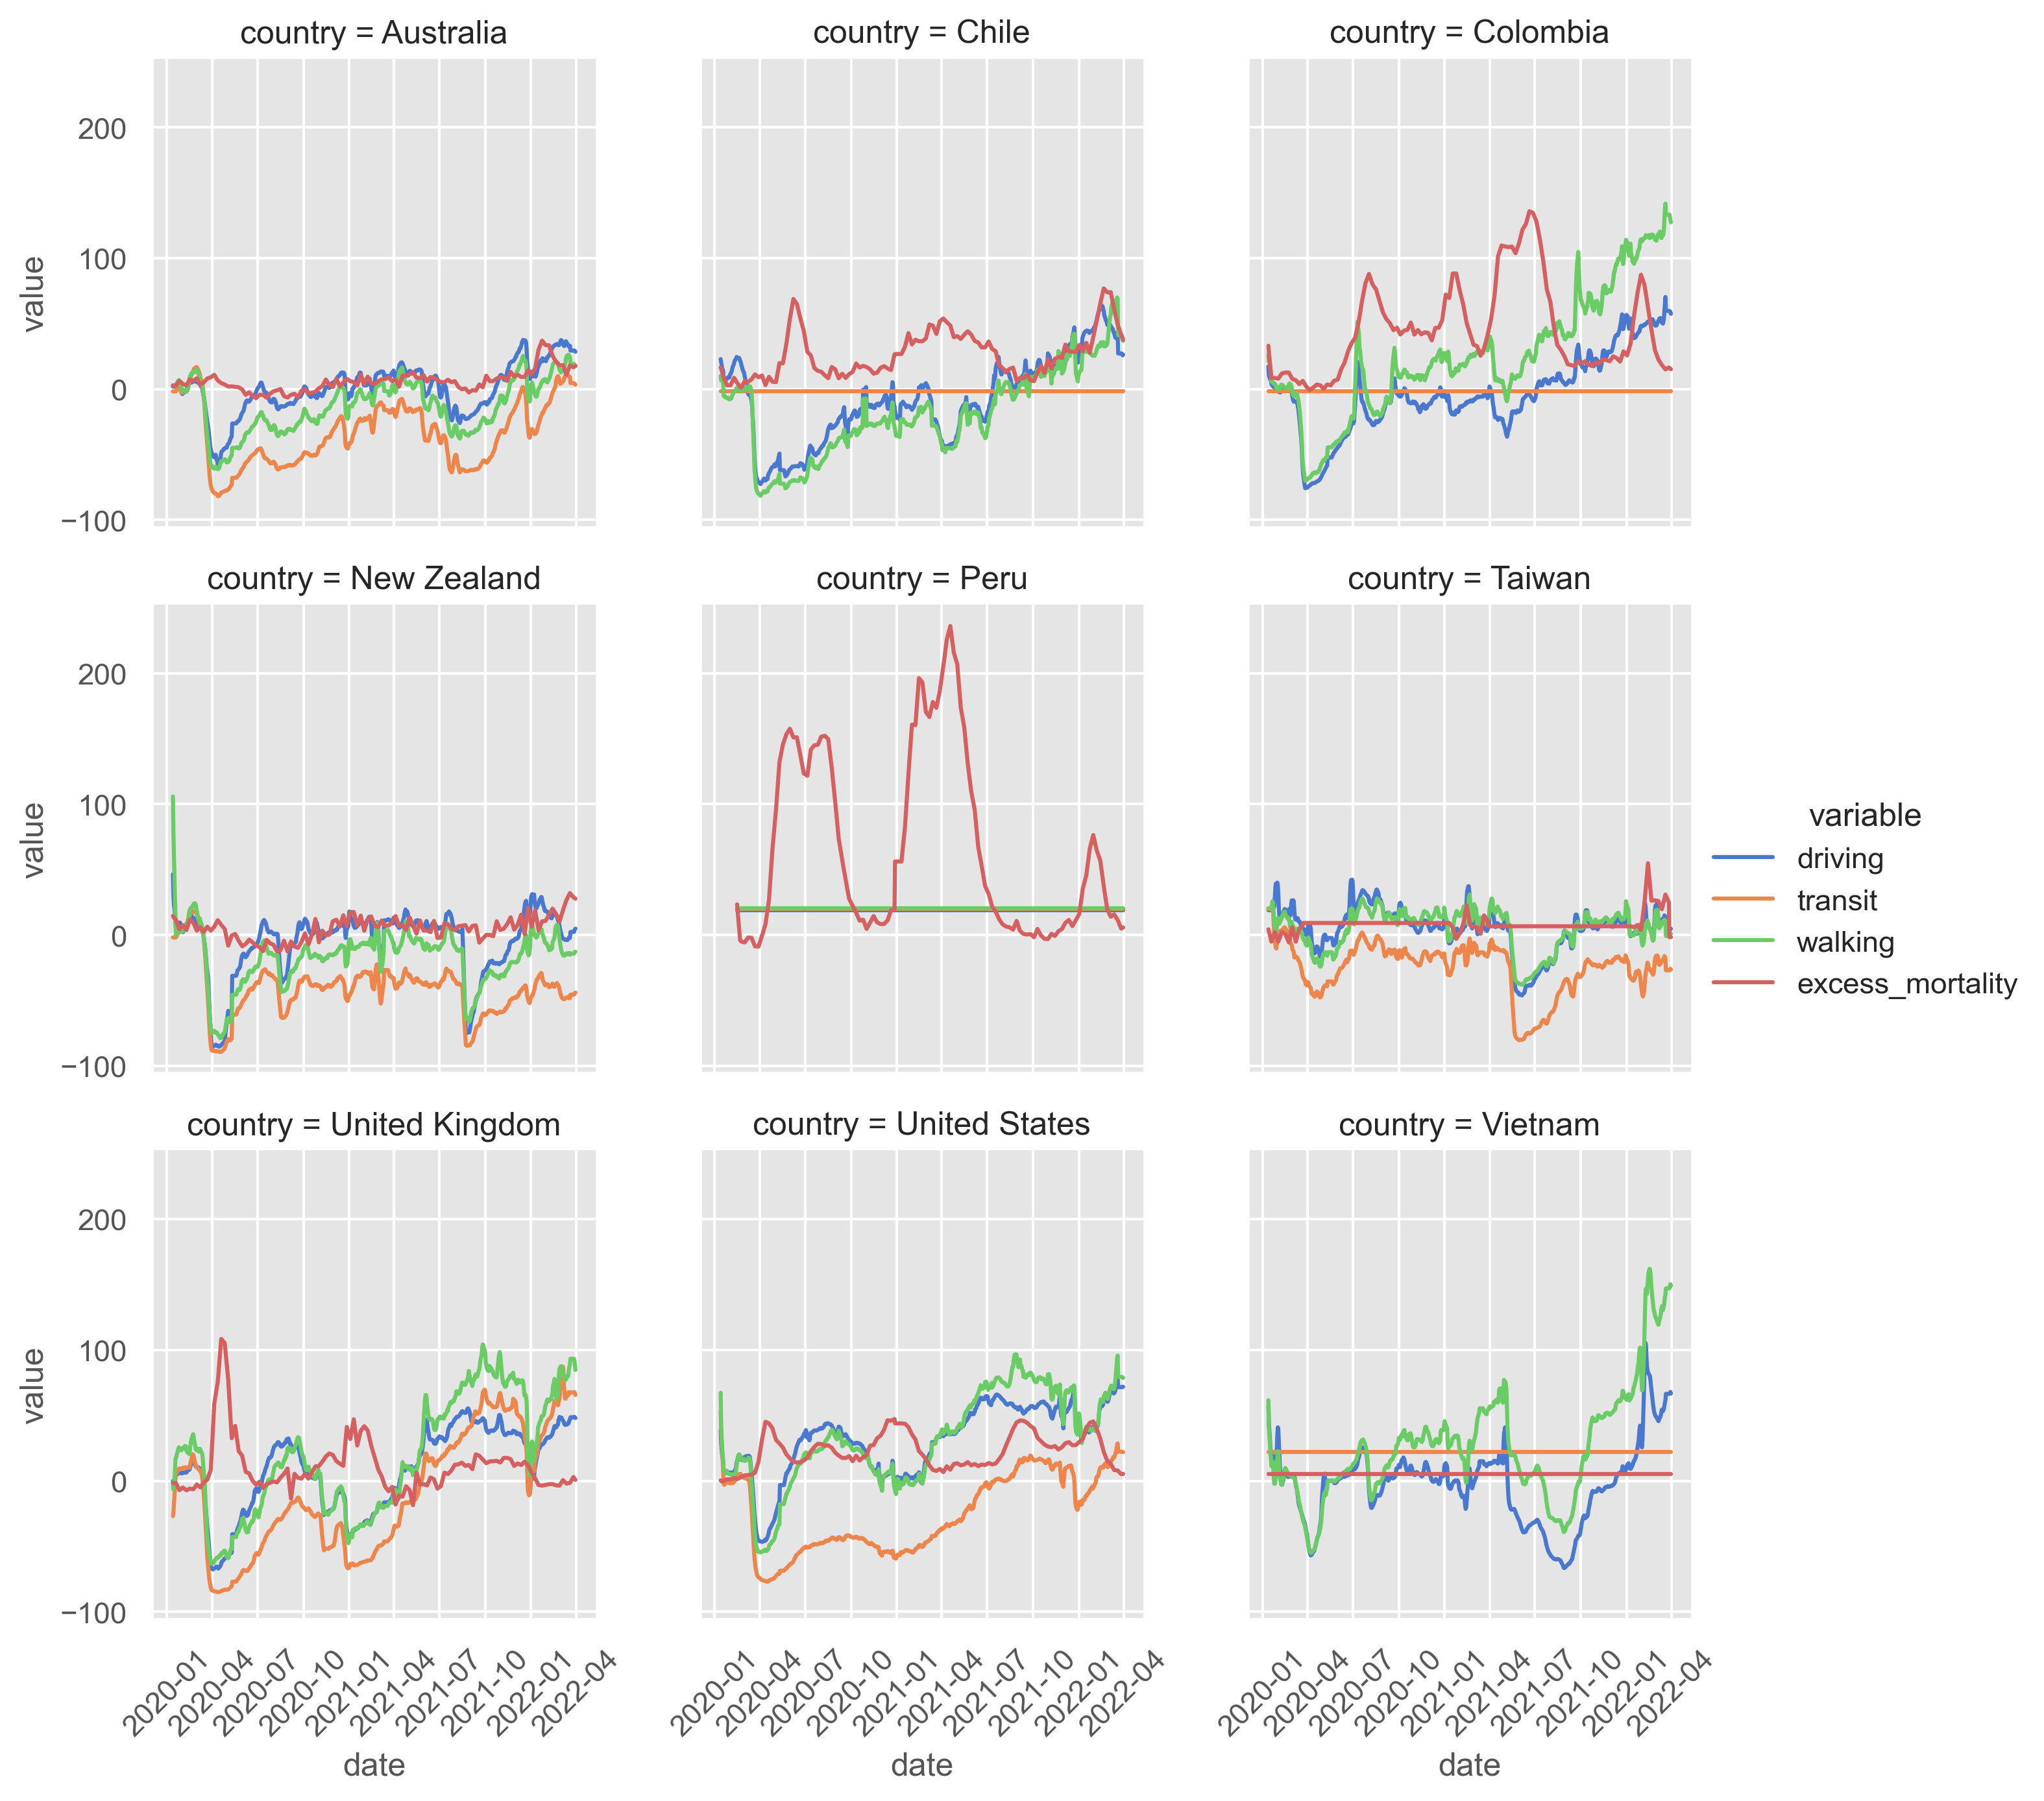

In [42]:
sns.set_theme(style="darkgrid")
plt.style.use('ggplot')
g1 = sns.FacetGrid(df_melt1, col='country', hue='variable', col_wrap=3,  palette="muted")
g1 = g1.map(sns.lineplot, 'date', 'value')
g1.add_legend()
g1.set_xticklabels(rotation=45)
sns.FacetGrid.savefig("testing123")

In [20]:
vars2 = "excess_mortality", "retail and recreation", "grocery and pharmacy", "parks", "transit stations", "workplaces", "residential"
df_mod2 = df[df["year"]>2019]
df_mod2 = df_mod2[["country", "date", "excess_mortality", "retail and recreation", "grocery and pharmacy", "parks", "transit stations", "workplaces", "residential" ]]
df_mod2[["excess_mortality", "retail and recreation", "grocery and pharmacy", "parks", "transit stations", "workplaces", "residential"]] = df_mod2.rolling(14)[vars2].mean().fillna(method='bfill').fillna(method='ffill')
df_melt2 = pd.melt(df_mod2, ["country", 'date'])
df_melt2.head(20)

,country,date,variable,value
0,Australia,2020-01-13,excess_mortality,4.366951
1,Australia,2020-01-14,excess_mortality,4.366951
2,Australia,2020-01-15,excess_mortality,4.366951
3,Australia,2020-01-16,excess_mortality,4.366951
4,Australia,2020-01-17,excess_mortality,4.366951
5,Australia,2020-01-18,excess_mortality,4.366951
6,Australia,2020-01-19,excess_mortality,4.366951
7,Australia,2020-01-20,excess_mortality,4.366951
8,Australia,2020-01-21,excess_mortality,4.366951
9,Australia,2020-01-22,excess_mortality,4.366951


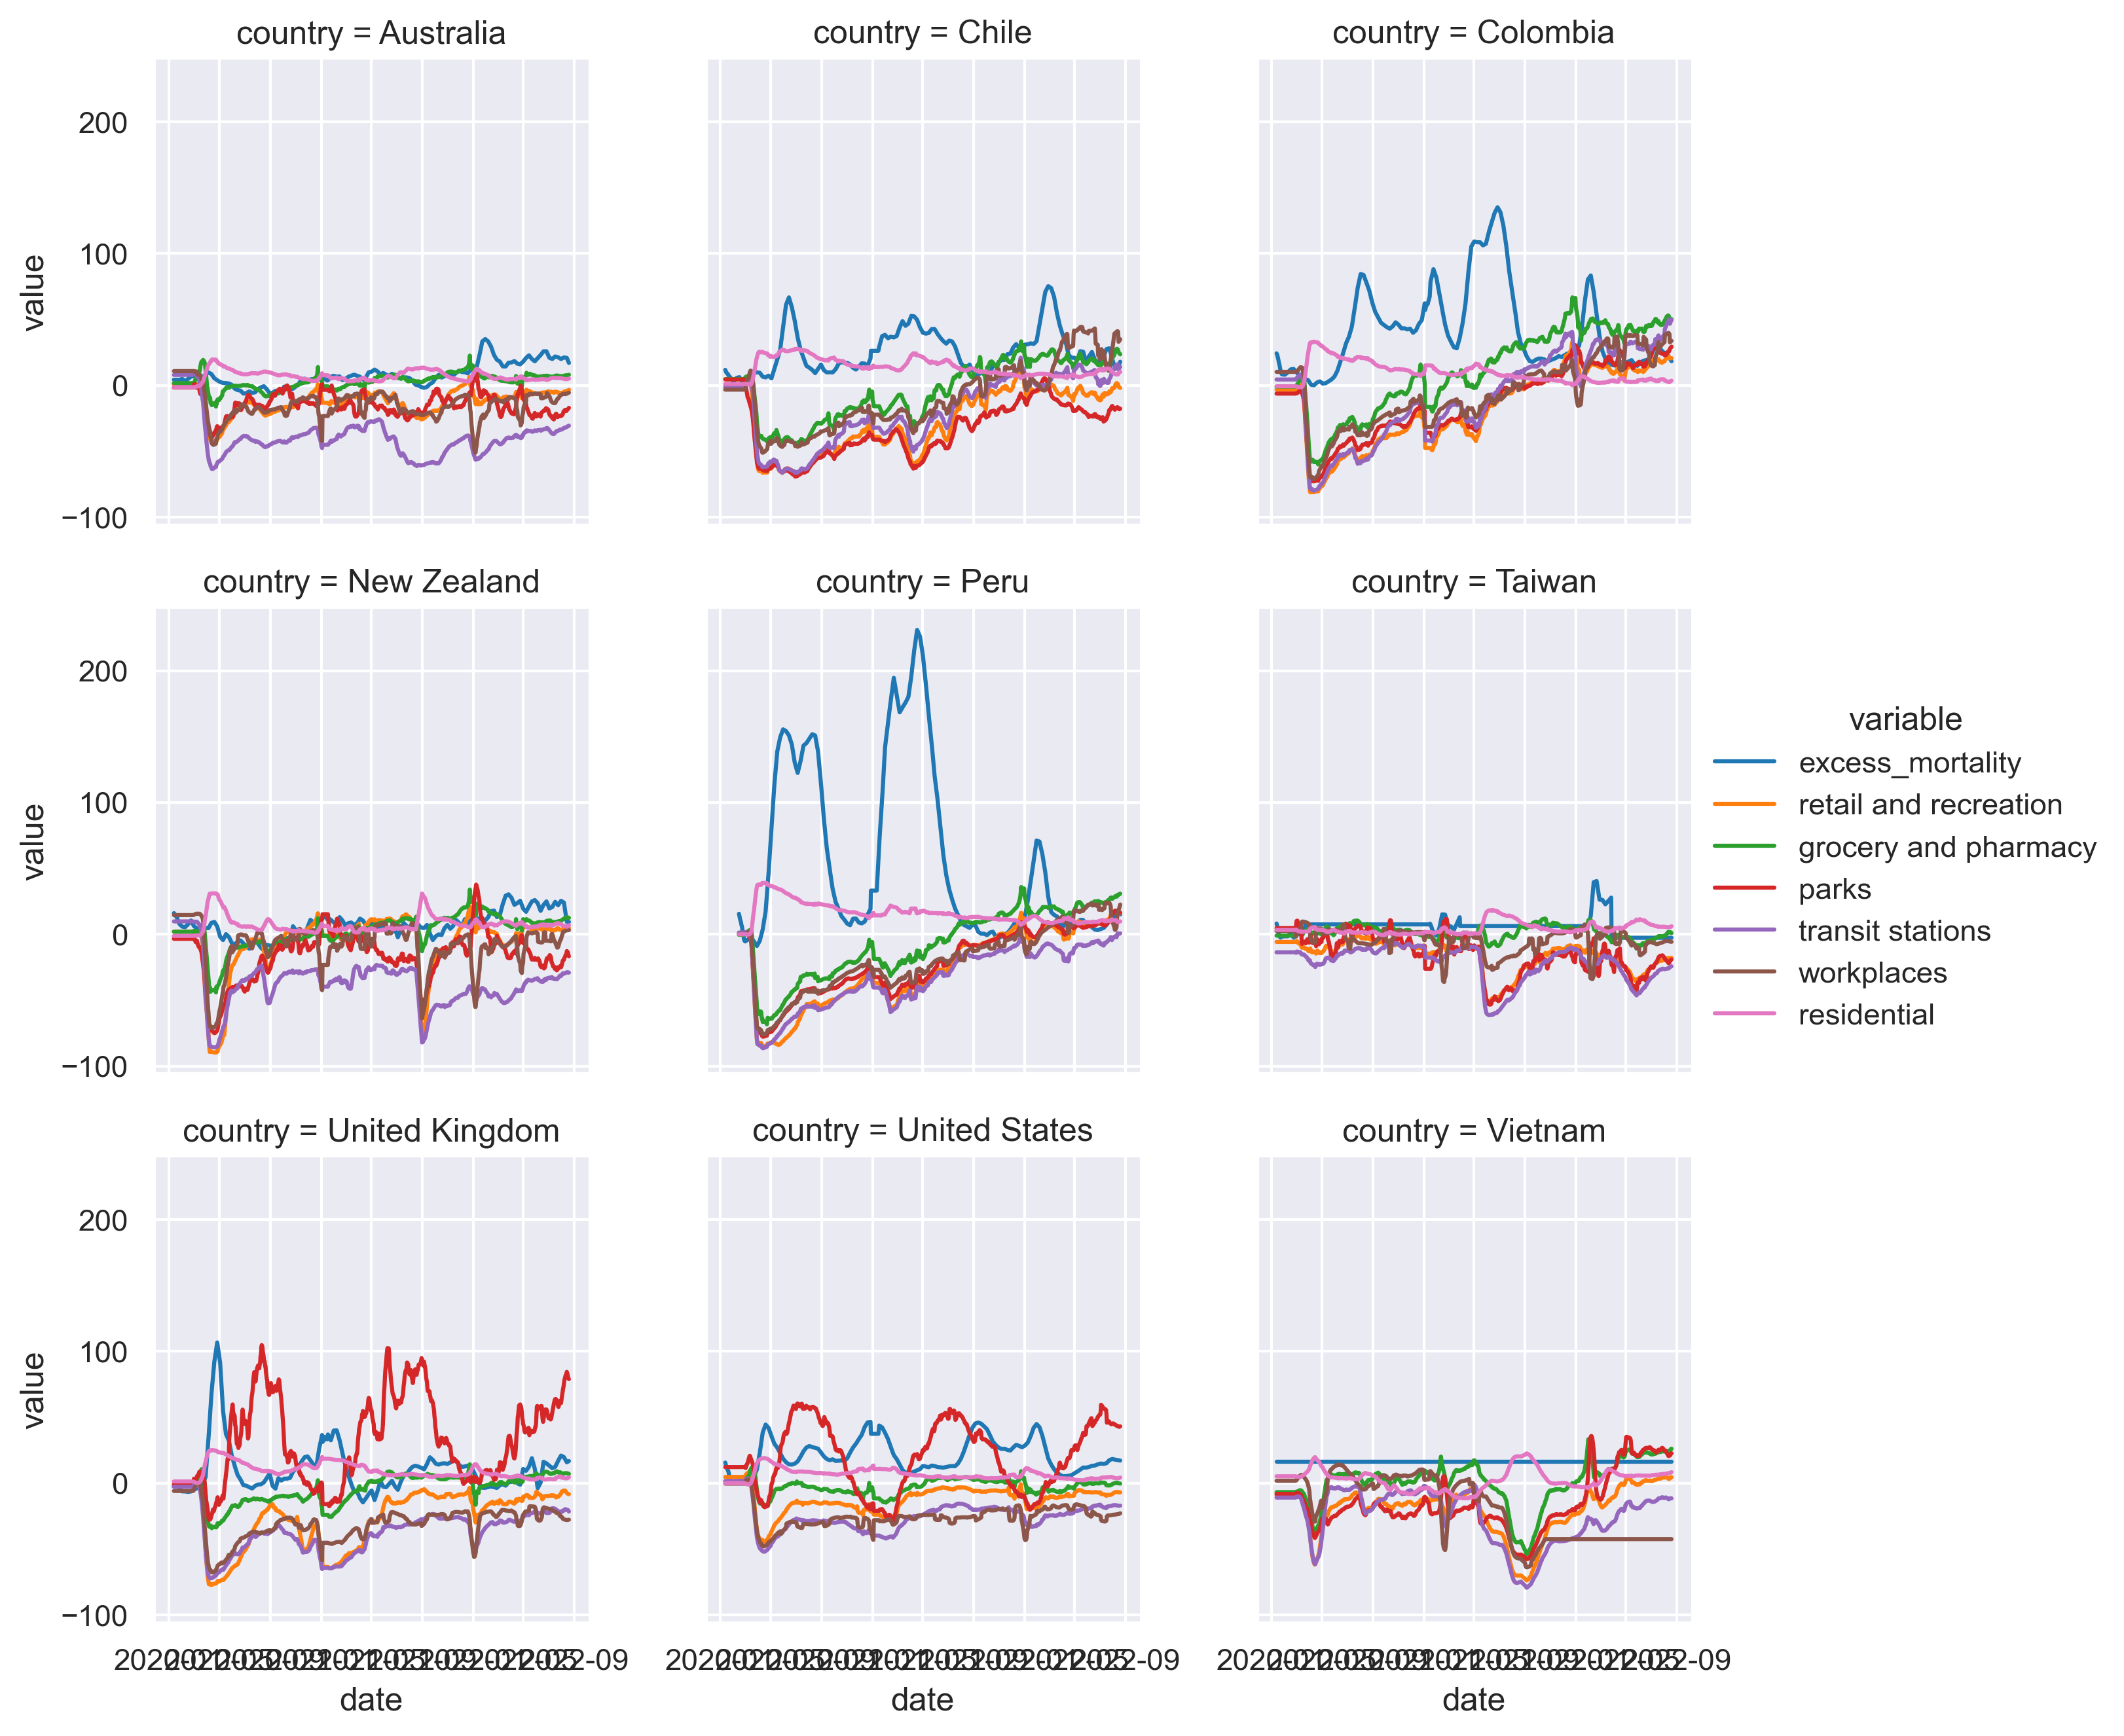

In [21]:
sns.set_theme(style="darkgrid")
g2 = sns.FacetGrid(df_melt2, col='country', hue='variable', col_wrap=3, palette="tab10")
g2 = g2.map(sns.lineplot, 'date', 'value', ci=None).add_legend()